Number of people in 2015
[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


<BarContainer object of 11 artists>

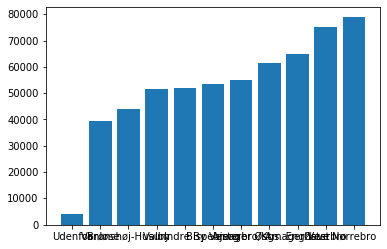

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#1.Open the file './befkbhalderstatkode.csv'
#2.Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
#3.Using this data: Find out how many people lived in each of the 11 areas in 2015

filename = './befkbhalderstatkode.csv'
people = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)


neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = people[mask & (people[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people
print("Number of people in 2015")
mask = (people[:,0] == 2015)
peps = np.array([number_of_people_per_neighbourhood(n, mask) for n in neighb.keys()])
print(peps)


#4.Make a bar plot to show the size of each city area from the smallest to the largest

peopleindk = (dict(zip(neighb.values(),peps)))
#listsorted = sorted(peopleindk.item())
sorted_people = {k: v for k, v in sorted(peopleindk.items(), key=lambda item: item[1])}

plt.bar(sorted_people.keys(),sorted_people.values())



In [19]:
#5.Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

mask_over_65 = (people[:,2] >= 65) & (people[:,0] == 2015)
print("Numbers of people over 65 living in Copenhagen in 2015")
print(mask_over_65.sum())

Numbers of people over 65 living in Copenhagen in 2015
2837


In [16]:
#6.How many of those were from the other nordic countries (not dk)
mask_not_denmark = (people[:,3] != 5130) & (people[:,2] == 65) & (people[:,0] == 2015)
over_65_not_denmark = people[mask_not_denmark]
print("Number of people outside of Denmark")
print(over_65_not_denmark[:,4].sum())

Numbers of people over 65 living in Copenhagen in 2015
4093


[62221 62583 63050 63572 64503 65856 66148 66295 66673 66877 67020 67550
 67516 67671 67351 67330 67964 68769 69951 70938 72400 73388 74521 75113]
[47854 47589 47538 47633 47734 48275 49109 49520 50312 50756 51039 51045
 50869 50643 50303 50964 51466 53351 55315 57150 58411 59211 60328 61623]


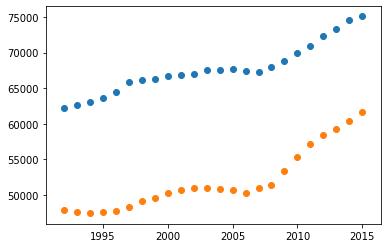

In [43]:
#7.Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

def number_of_people_per_year_in(n, mask):
    all_people_in_given_n = people[mask & (people[:,0] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

years = np.array(range(1992, 2016))
mask_østerbro = (people[:,1] == 2)
mask_vesterbro = (people[:,1] == 4)
østerbro_people = np.array([number_of_people_per_year_in(year, mask_østerbro) for year in years])
vesterbro = np.array([number_of_people_per_year_in(n, mask_vesterbro) for n in years])

print(østerbro_people)
print(vesterbro)


plt.scatter(years, østerbro_people)
plt.scatter(years, vesterbro)